## Rectangular Waveguide
Also called channel waveguide, strip waveguide.

<img src="./Images/rectangular_waveguide.png" width="500"/>

By definition, waveguide is a system that is homogeneous along a propagating axis (here $z$ axis). We look for solutions (**modes**) that vary harmonically with $z$. Mode profile:
$$ \bold{E}(x,y)\text{exp}(i\beta z) $$
$$ \bold{H}(x,y)\text{exp}(i\beta z) $$
with propagation constant $\beta$, effective index $n_\text{eff} = \beta/k$.

### TE-polarization (TE-like)
Suppose $H_x = 0$ (approximation!), $E_x$ and $H_y$ is predominent. Note that $H_y$ __is continuous across all__ $x, y$, while $E_x$ may be discontinous at specific interfaces. The wave equation for the principal $H_y$ component:
$$ \frac{\partial^2 H_y}{\partial x^2} + \frac{\partial^2 H_y}{\partial y^2} + \left[ k^2 n(x,y)^2 - \beta^2\right]H_y = 0 $$

- Boundary condition 1: $E_z$ is continuous at $x = a$ and $x = -a$
$$ E_z \propto \frac{1}{n^2}\frac{\partial H_y}{\partial x} $$
- Boundary condition 2: $H_z$ is continuous at $y = b$ and $y = -b$
$$ H_z \propto \frac{\partial H_y}{\partial y} $$

Assume that the electromagnetic fields can be expressed with the separation of variables:
$$ H_y(x,y) = X(x)Y(y) $$

Injecting the above ansatz into the wave equation and dividing by $XY$:
$$ \frac{1}{X}\frac{d^2 X}{dx^2} + \frac{1}{Y}\frac{d^2 Y}{dy^2} + \left[ k^2 n(x,y)^2 - \beta^2\right] = 0 $$

Introducing an (equivalent $x$-depedent, $y$-averaged) effective index, denoted by $n_\text{eq}$:
$$ \begin{align}
\frac{1}{Y}\frac{d^2 Y}{dy^2} + \left[ k^2 n(x,y)^2 - k^2 n_\text{eq}(x)^2\right] & = 0 \\
\frac{1}{X}\frac{d^2 X}{dx^2} + \left[ k^2 n_\text{eq}(x)^2 - \beta^2\right] & = 0
\end{align} $$

We divide (horizonally) the waveguide into a set of slices. In each slice, the medium is invariant in $x$-direction, thus can be treated as a slab waveguide. Precisely, we solve $Y$ using equation (1). Continuity of $H_y$ and boundary condition 2 are translated to continuity of $Y$ and $dY/dy$ at $y=b, -b$. It turns out that $Y$ can be obtained using similar __TE-mode__ equation of a slab waveguide. After solving the effective index associated with each slice, we then solve the $x$-dependent equation (2) based on the equivalent effective slab index $n_\text{eq}$. Continuity of $H_y$ and boundary condition 1 are translated to continuity of $X$ and $1/n^2\:dX/dx$ at $x=a, -a$. It turns out to solve the __TM-mode__ equation of a slab waveguide.

In [3]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.style.use(r"C:\Users\B30724\Documents\Python\presentation.mplstyle")

In [2]:
def eqn_te(neq, m, n1, n2, b, wavelength):
    k = 2*np.pi/wavelength
    h1 = k*np.sqrt(n1**2 - neq**2)
    g2 = k*np.sqrt(neq**2 - n2**2)
    with np.errstate(divide='ignore'):
        val = m*np.pi/2 + np.arctan(g2/h1) - h1*b
    return val

In [4]:
b = 0.11e-6  # Half of the waveguide thickness
wavelength = 1.31e-6  # Vacuum wavelength
n1 = 3.5068525745481187  # 1310 nm
n2 = 1.4467245597197314  # 1310 nm
# wavelength = 1.55e-6  # Vacuum wavelength
# n1 = 3.4763795526495227  # 1550 nm
# n2 = 1.4440023011779028  # 1550 nm
m = 0  # Mode number for vertical confinement: 0 for the fundamental mode

func_te = lambda neq: eqn_te(neq, m, n1, n2, b, wavelength)
if func_te(n2) > 0:  # func_te(n1) > 0 always true
    print("Mode not found.")
else:
    root = root_scalar(func_te, bracket=(n2, n1), x0=n1)
    if root.converged:
        neq = root.root
        print(f"Effective index of slab mode (m={m}): {neq}")

Effective index of slab mode (m=0): 2.99465530798706


Once we have obtain an equivalent, effective index in the waveguide slice. We turn to solve the problem in $x$-direction (collapsing $y$-direction). Here, $n_\text{eq}$ could be the index obtained by solving the TE-mode equation, and also $n_2$ index of the cladding outside the waveguide region.
$$ \frac{d^2 X}{dx^2} + \left[ k^2 n_\text{eq}^2 - \beta^2\right]X = 0 $$

Solving the above equation in respective homogeneous media:
$$ \begin{align}
X & = \text{cos}(h a - \phi)\text{exp}[-\gamma(x-a)] \quad && \text{if}\ x > a \\
& = \text{cos}(h x - \phi) \quad && \text{if}\ -a < x < a \\
& = \text{cos}(h a + \phi)\text{exp}[\gamma(x+a)] \quad && \text{if}\ x < -a
\end{align} $$

where
$$ \begin{align}
h & = \sqrt{k^2 n_\text{eq}^2 - \beta^2} \\
\gamma & = \sqrt{\beta^2 - k^2 n_2^2}
\end{align} $$

- $X$ continuous at $x=a$ and $x=-a$. Yes!
- $1/n^2\:dX/dx$ continuous at $x=a$ and $x=-a$

$$ \begin{align}
\frac{dX}{dx} & = -\gamma \text{cos}(h a - \phi)\text{exp}[-\gamma(x-a)] \quad && \text{if}\ x > a \\
& = -h \text{sin}(h x - \phi) \quad && \text{if}\ -a < x < a \\
& = \gamma \text{cos}(h a + \phi)\text{exp}[\gamma(x+a)] \quad && \text{if}\ x < -a
\end{align} $$

Here, $\phi=0$ by symmetry ($x:=-x$ should give the same result). We have:
$$ \frac{h}{n_\text{eq}^2} \text{sin}(h a) = \frac{\gamma}{n_2^2} \text{cos}(h a) $$

Actually, that is same as the TM-mode equation:
$$ \text{tan}(h a) = \frac{n_\text{eq}^2}{n_2^2} \frac{\gamma}{h} $$

Finally:
$$ h a = n\pi + \text{tan}^{-1}\left(\frac{n_\text{eq}^2}{n_2^2} \frac{\gamma}{h}\right) $$
$$ n=0,1,2,... $$

In [5]:
def eqn_tm(neff, n, neq, n2, a, wavelength):
    k = 2*np.pi/wavelength
    h = k*np.sqrt(neq**2 - neff**2)
    g = k*np.sqrt(neff**2 - n2**2)
    with np.errstate(divide='ignore'):
        val = n*np.pi + np.arctan(neq**2/n2**2*g/h) - h*a
    return val

In [6]:
a = 0.205e-6  # Half of the waveguide width
n = 0  # Mode number for horizontal confinement: 0 for the fundamental mode

func_tm = lambda neff: eqn_tm(neff, n, neq, n2, a, wavelength)
try:
    root_new = root_scalar(func_tm, bracket=[n2, neq], method='brentq')
    print("Root found:", root_new)
except ValueError as e:
    print("Error:", e)

if func_tm(n2) > 0:  # func_tm(n1) > 0 always true
    print("Mode not found.")
else:
    root = root_scalar(func_tm, bracket=(n2, neq), x0=neq)
    if root.converged:
        neff = root.root
        print(f"Effective index of rectangular mode (m={m}): {neff}")

Root found:       converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 2.6243874681404105
         method: brentq
Effective index of rectangular mode (m=0): 2.6243874681404105


### Field in symmetrical cladding

$$ \begin{align}
Y & = \text{cos}(h_y b)\text{exp}[-\gamma_y(y-b)] \quad && \text{if}\ y > b \\
& = \text{cos}(h_y y) \quad && \text{if}\ -b < y < b \\
& = \text{cos}(h_y b)\text{exp}[\gamma_y(y+a)] \quad && \text{if}\ y < -b
\end{align} $$

$$ \begin{align}
X & = \text{cos}(h_x a)\text{exp}[-\gamma_x(x-a)] \quad && \text{if}\ x > a \\
& = \text{cos}(h_x x) \quad && \text{if}\ -a < x < a \\
& = \text{cos}(h_x a)\text{exp}[\gamma_x(x+a)] \quad && \text{if}\ x < -a
\end{align} $$

$$ \begin{align}
H_y(x,y) & = X(x)Y(y) \qquad\text{approximation...} \\
E_x(x,y) & \propto \frac{1}{\varepsilon} \left[\beta H_y - \frac{1}{\beta}\frac{\partial^2 H_y}{\partial y^2}\right] \approx \frac{\beta}{\varepsilon} H_y \\
E_z(x,y) & \propto \frac{i}{\varepsilon} \frac{\partial H_y}{\partial x} \\
& = -\frac{\gamma_x}{n_2^2} \text{cos}(h_x a)\text{exp}[-\gamma_x(x-a)]Y \quad && \text{if}\ x > a \\
& = -\frac{h_x}{n_\text{eq}^2}\text{sin}(h_x x)Y \quad && \text{if}\ -a < x < a \\
& = \frac{\gamma_x}{n_2^2} \text{cos}(h_x a)\text{exp}[\gamma_x(x+a)]Y \quad && \text{if}\ x < -a
\end{align} $$

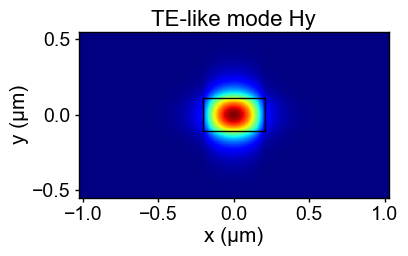

In [7]:
width = 2*a*1e6
height = 2*b*1e6
x1 = np.linspace(-a, a, 111)  # Waveguide
x2 = np.linspace(-5*a, -a, 221)[:-1:]  # Left cladding
x3 = np.linspace(a, 5*a, 221)[1::]  # Right cladding
x = np.hstack([x2, x1, x3])
y1 = np.linspace(-b, b, 111)  # Waveguide
y2 = np.linspace(-5*b, -b, 221)[:-1:]  # Bottom cladding
y3 = np.linspace(b, 5*b, 221)[1::]  # Top cladding
y = np.hstack([y2, y1, y3])

k = 2*np.pi/wavelength
hy = k*np.sqrt(n1**2 - neq**2)
gy = k*np.sqrt(neq**2 - n2**2)
fy = np.hstack([np.cos(hy*b)*np.exp(gy*(y2+b)),
                np.cos(hy*y1),
                np.cos(hy*b)*np.exp(-gy*(y3-b))])
hx = k*np.sqrt(neq**2 - neff**2)
gx = k*np.sqrt(neff**2 - n2**2)
fx = np.hstack([np.cos(hx*a)*np.exp(gx*(x2+a)),
                np.cos(hx*x1),
                np.cos(hx*a)*np.exp(-gx*(x3-a))])
Fx, Fy = np.meshgrid(fx, fy)
Hy = Fx*Fy

fig, ax = plt.subplots(figsize=(4,3))
ax.pcolormesh(x*1e6, y*1e6, Hy, cmap='jet')
ax.add_patch(Rectangle((-width/2,-height/2), width, height, ls="-", lw=1, ec="k", fc="none"))
ax.set(xlabel="x (µm)", ylabel="y (µm)", title="TE-like mode Hy")
ax.set_aspect("equal")

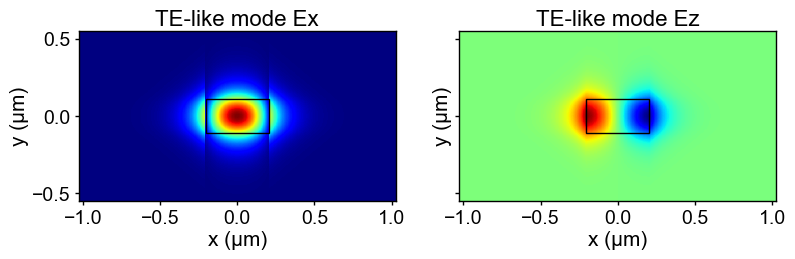

In [8]:
Epsilon = n2**2*np.ones_like(Hy)
Epsilon[:,(x>=-a)&(x<=a)] = neq**2
Ex = Hy / Epsilon

fx_prime = np.hstack([gx/n2**2*np.cos(hx*a)*np.exp(gx*(x2+a)),
                      -hx/neq**2*np.sin(hx*x1),
                      -gx/n2**2*np.cos(hx*a)*np.exp(-gx*(x3-a))])
Fx_prime, Fy_prime = np.meshgrid(fx_prime, fy)
Ez = Fx_prime * Fy_prime
# Note that we choose Ex to be real and Ez will be imaginary!

fig, axs = plt.subplots(1,2, figsize=(9,3), sharey=True)
axs[0].pcolormesh(x*1e6, y*1e6, Ex, cmap='jet')
axs[0].set_title("TE-like mode Ex")
axs[1].pcolormesh(x*1e6, y*1e6, Ez, cmap='jet')
axs[1].set_title("TE-like mode Ez")
for ax in axs:
    ax.add_patch(Rectangle((-width/2,-height/2), width, height, ls="-", lw=1, ec="k", fc="none"))
    ax.set(xlabel="x (µm)", ylabel="y (µm)")
    ax.set_aspect("equal")

There are some approximations here... Especially, fields at the corners are not accurate...

Still, we should be able to see that:
- $H_y$ is continuous over all $x,y$ (tangential and perpendicular component)
- $E_x$ is continuous over $y$, but discontinuous at $x=\pm a$ (for perpendicular component, we have continuity of $D=E/\varepsilon$)
- $E_z$ is continuous over all $x,y$ (tangential component)